# <center>**- SES 722 : TP n°5 Économétrie -**</center>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## **Exercice 1 :**

In [2]:
df = pd.read_csv('textfiles/intdef.raw', delim_whitespace=True, header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1948,1.04,8.1,16.2,11.6,-4.600000,.,.,.,.,.,.,0
1,1949,1.10,-1.2,14.5,14.3,-0.200000,1.04,8.1,-4.6,.0600001,-9.3,4.400001,0
2,1950,1.22,1.3,14.4,15.6,1.200001,1.1,-1.2,-.1999998,.12,2.5,1.400001,0
3,1951,1.55,7.9,16.1,14.2,-1.900001,1.22,1.3,1.200001,.3299999,6.6,-3.100001,0
4,1952,1.77,1.9,19.0,19.4,0.400000,1.55,7.9,-1.900001,.22,-6,2.3,0


In [4]:
df.describe()

,0,1,2,3,4,5,12
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,1975.500000,4.908214,3.883929,17.923214,19.525000,1.601786,0.482143
std,16.309506,2.868242,3.040381,1.202723,2.308266,2.109415,0.504203
min,1948.000000,0.950000,-1.200000,14.400000,11.600000,-4.600000,0.000000
25%,1961.750000,2.892500,1.675000,17.475000,18.575000,0.300001,0.000000
50%,1975.500000,4.735000,3.050000,17.800000,19.450000,1.450000,0.000000
75%,1989.250000,6.515000,5.425000,18.500000,21.225000,2.950001,1.000000
max,2003.000000,14.030000,13.500000,20.900000,23.500000,6.100000,1.000000


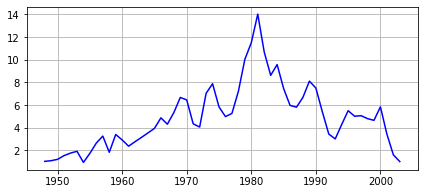

In [16]:
year = df[0]
i3 = df[1]

plt.figure(figsize=(7,3))
plt.plot(year, i3, color='blue')
plt.grid(True)
plt.show()

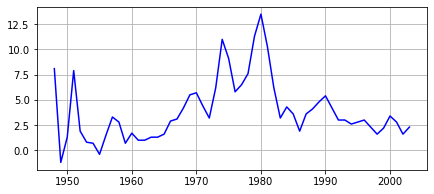

In [17]:
inf = df[2]

plt.figure(figsize=(7,3))
plt.plot(year, inf, color='blue')
plt.grid(True)
plt.show()

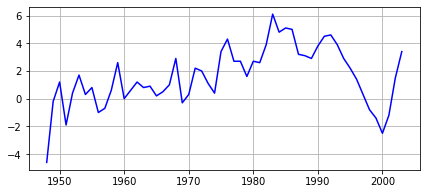

In [18]:
deficit = df[5]

plt.figure(figsize=(7,3))
plt.plot(year, deficit, color='blue')
plt.grid(True)
plt.show()

## **Exercice 2 :**
Estimer le modèle $y(t) = i3(t)$ en fonction d’une constante, de $\text{def}(t − 1)$ et $\text{inf} (t − 1)$.

In [51]:
n = len(inf)
inf_1 = inf[0:n-1]
def_1 = deficit[0:n-1]
y = pd.DataFrame(i3[1:n])
y = y.reset_index(drop=True)
const = np.ones(n-1)

col = {'const':const, 'inf_1':inf_1, 'def_1':def_1} 
X = pd.DataFrame(data=col)

In [52]:
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      1   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     38.03
Date:                Fri, 06 Mar 2020   Prob (F-statistic):           6.67e-11
Time:                        15:48:50   Log-Likelihood:                -110.27
No. Observations:                  55   AIC:                             226.5
Df Residuals:                      52   BIC:                             232.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8930      0.435      4.356      0.0

## **Exercice 3 :**
Tester l’autocorrélation des erreurs.

In [53]:
u = results.resid
n = len(u)
u_1 = u[0:n-1].values

X = u_1
y = u[1:n]
model=sm.OLS(y,X)
results1 = model.fit()
print(results1.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.332
Model:                            OLS   Adj. R-squared (uncentered):              0.319
Method:                 Least Squares   F-statistic:                              26.32
Date:                Fri, 06 Mar 2020   Prob (F-statistic):                    4.20e-06
Time:                        15:53:19   Log-Likelihood:                         -96.613
No. Observations:                  54   AIC:                                      195.2
Df Residuals:                      53   BIC:                                      197.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

$p = 0$ donc on rejette l'hypothèse $H_0$ à 1%.

## **Exercice 4 :**
Le prof n'a pas réussi à le faire. 

## **Exercice 5 :**
Introduire $\text{inf}(t − 2)$ et $\text{def}(t − 2)$ dans le modèle de l’exercice 2. Représentez les délais distribués.

In [60]:
n = len(i3)
y = i3[2:n].reset_index(drop=True)
inf_1 = inf[1:n-1].reset_index(drop=True)
inf_2 = inf[0:n-2]
def_1 = deficit[1:n-1].reset_index(drop=True)
def_2 = deficit[0:n-2]
const = np.ones(n-2)

col5 = {'const':const, 'inf_1':inf_1, 'inf_2':inf_2, 'def_1':def_1, 'def_2':def_2}
X5 = pd.DataFrame(data=col5)

In [61]:
model=sm.OLS(y,X5)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      1   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     21.97
Date:                Fri, 06 Mar 2020   Prob (F-statistic):           1.96e-10
Time:                        16:01:08   Log-Likelihood:                -104.39
No. Observations:                  54   AIC:                             218.8
Df Residuals:                      49   BIC:                             228.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8573      0.427      4.345      0.0

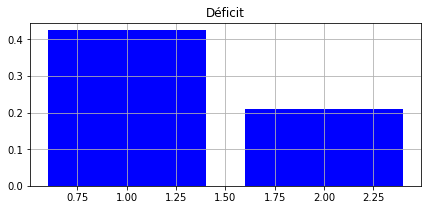

In [66]:
d_inf = (results.params[1], results.params[2])
x = (1,2)

# On affiche le déficit
plt.figure(figsize=(7,3))
plt.bar(x, d_inf, color='blue')
plt.title('Déficit')
plt.grid(True)
plt.show()

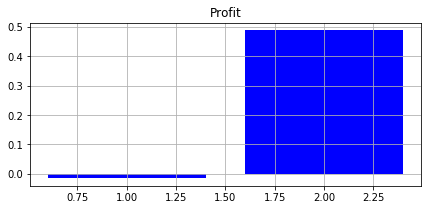

In [67]:
d_inf = (results.params[3], results.params[4])
x = (1,2)

# On affiche le profit
plt.figure(figsize=(7,3))
plt.bar(x, d_inf, color='blue')
plt.title('Profit')
plt.grid(True)
plt.show()

## **Exercice 6 :**
Test l’hypothèse de causalité de Granger de l’effet de l’inflation sur ***i3***.

### Modèle non contraint

In [76]:
n = len(i3)
y = i3[2:n].reset_index(drop=True)
inf_1 = inf[1:n-1].reset_index(drop=True)
inf_2 = inf[0:n-2]
def_1 = deficit[1:n-1].reset_index(drop=True)
def_2 = deficit[0:n-2]
const = np.ones(n-2)

col6 = {'const':const, 'inf_1':inf_1, 'inf_2':inf_2, 'def_1':def_1, 'def_2':def_2}
X0 = pd.DataFrame(data=col6)

In [77]:
model = sm.OLS(y,X0)
results = model.fit()
print(results.summary())
u = results.resid
SSR0 = u.T@u

                            OLS Regression Results                            
Dep. Variable:                      1   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     21.97
Date:                Fri, 06 Mar 2020   Prob (F-statistic):           1.96e-10
Time:                        16:15:37   Log-Likelihood:                -104.39
No. Observations:                  54   AIC:                             218.8
Df Residuals:                      49   BIC:                             228.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8573      0.427      4.345      0.0

### Modèle contraint

In [74]:
# on retire du modèle inf_1 et inf_2
col6 = {'const':const, 'def_1':def_1, 'def_2':def_2}
X6 = pd.DataFrame(data=col6)

# on garde le même y
model = sm.OLS(y,X6)
results = model.fit()
print(results.summary())
u = results.resid
SSR6 = u.T@u

                            OLS Regression Results                            
Dep. Variable:                      1   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     9.709
Date:                Fri, 06 Mar 2020   Prob (F-statistic):           0.000267
Time:                        16:12:55   Log-Likelihood:                -123.42
No. Observations:                  54   AIC:                             252.8
Df Residuals:                      51   BIC:                             258.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8495      0.444      8.665      0.0

In [75]:
from scipy.stats import f

n,k = np.shape(X0)
F = ((SSR6-SSR0)/2)/(SSR0/(n-k))
 
print('pvalue', f.sf(F,2,n-k) )
print('Fisher', F)

pvalue 3.175759714986272e-08
Fisher 25.069338083292674


> On rejette donc l'hypothèse $H_0$ puisque $p < 0.01$